In [46]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3d

In [47]:
df = pd.read_csv("data_delete.csv", encoding='gbk', dtype=float)
list(df)

['年（00～99）',
 '月（01～12）',
 '日（01～31）',
 '时（00～23）',
 '分（00～59）',
 '秒（00～59）',
 'M1车电机1温度T1  1=1℃',
 'M1车电机2温度T2  1=1℃',
 'M1车电机3温度T3  1=1℃',
 'M1车电机4温度T4  1=1℃',
 'M1车电机1转速（1=1 r/min）',
 'M1车电机2转速（1=1 r/min）',
 'M1车电机3转速（1=1 r/min）',
 'M1车电机4转速（1=1 r/min）',
 'M1车实际牵引力（1=0.01kN）',
 'M1车实际电制动力（1=0.01kN）',
 'M1电机电流',
 '制动',
 '牵引',
 '惰行',
 'DTO模式',
 'ATO模式',
 'ATP模式',
 '当前站台号',
 '下一站台号',
 '终点站台号',
 '牵引制动级位信号(1=1%)',
 'M1车DCU中等故障',
 '列车综合速度（1=0.1km/h）',
 'M1车环温值']

In [48]:
error = ["M1车DCU中等故障"]
time_list = ["年（00～99）","月（01～12）","日（01～31）","时（00～23）","分（00～59）","秒（00～59）"]
feature_list = list(set(list(df)).difference(set(error)))
feature_list = list(set(list(feature_list)).difference(set(time_list)))
feature_list.sort()
feature_listea = [ 'M1车电机1温度T1  1=1℃',
 'M1车电机2温度T2  1=1℃',
 'M1车电机3温度T3  1=1℃',
 'M1车电机4温度T4  1=1℃',
 'M1车电机1转速（1=1 r/min）',
 'M1车电机2转速（1=1 r/min）',
 'M1车电机3转速（1=1 r/min）',
 'M1车电机4转速（1=1 r/min）',
 'M1车实际牵引力（1=0.01kN）',
 'M1车实际电制动力（1=0.01kN）',
 'M1电机电流',
 '制动',
 '牵引',
 '惰行', '牵引制动级位信号(1=1%)',
 '列车综合速度（1=0.1km/h）',
 'M1车环温值']



<Figure size 432x288 with 0 Axes>

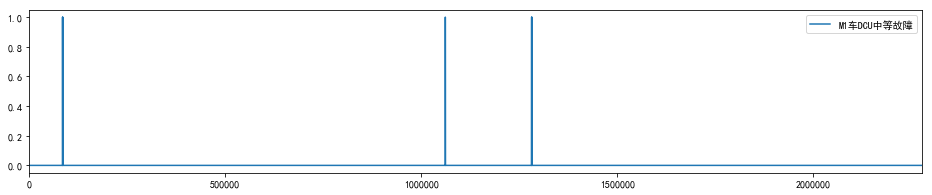

In [49]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure();
df[error].plot(figsize=(16, 3))
plt.legend(loc='best')

In [122]:
MAX_RUL = 4000
interval = 1
df_error = df[df[ 'M1车DCU中等故障']!=0]
error_len = len(df_error)
dysfunction_time = [85093, 1061474, 1282045]
df1 = df[dysfunction_time[0]-MAX_RUL:dysfunction_time[0]]
df1 = df1.append(df[dysfunction_time[1]-MAX_RUL:dysfunction_time[1]])
df1 = df1.append(df[dysfunction_time[2]-MAX_RUL:dysfunction_time[2]])
print(df_error.shape)
print(df1.shape)

(216, 30)
(12000, 30)


In [123]:
df2 = df[0:dysfunction_time[0] - MAX_RUL]
df2 = df2.append(df[dysfunction_time[1] + 100000:dysfunction_time[1] - MAX_RUL])
df2 = df2.append(df[dysfunction_time[2] + 100000:])
df2.reset_index(drop = True)
rows = list(range(0,len(df2)-100,interval))
df2 = df2.iloc[rows]
df2.shape



(976401, 30)

In [124]:
df3 = df_error.append(df1)
df3 = df3.append(df2)
df3 = df3[feature_list].values
from sklearn.preprocessing import StandardScaler
df3 = StandardScaler().fit_transform(df3)

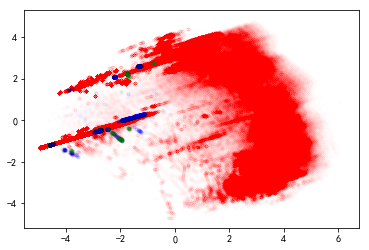

In [125]:
my_pca= PCA(n_components=2)
X = my_pca.fit_transform(df3)
plt.scatter(X[error_len + 3*MAX_RUL:,0],X[error_len + 3*MAX_RUL:,1],c='r',s=10,alpha=0.005)
plt.scatter(X[error_len:error_len + 3*MAX_RUL,0],X[error_len:error_len + 3*MAX_RUL,1],c='b',s=10,alpha=0.01)
plt.scatter(X[:error_len,0],X[:error_len,1],c='g',s=10,alpha=0.07)

plt.show()